In [6]:
import pandas as pd
import gspread as gs
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [7]:
SHEET_ID = '1WEM8wpCBgtW1SY2jTf7VS1rrDdFbBnOkxahsi0UH6tE'

SHEET_NAME = 'laptop_data_set'

url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'

df = pd.read_csv(url)

In [8]:
TypeName = {'2 in 1 Convertible': 68326.36006611567, 'Workstation': 121497.52568275864, 'Netbook': 33898.44096000001, 'Notebook': 41703.86760991739, 'Ultrabook': 82489.71342857143, 'Gaming': 91661.97960000005}

ScreenResolution = {'IPS Panel Quad HD+ 2560x1440': 100231.04639999999, 'IPS Panel Full HD 1920x1080': 71593.77153537121, 'Touchscreen 2560x1440': 123495.27634285713, 'IPS Panel Full HD 1366x768': 48058.56, '1920x1080': 23510.688, 'IPS Panel Touchscreen 2560x1440': 108105.12, 'IPS Panel Full HD 1920x1200': 14119.2, 'IPS Panel Touchscreen 1366x768': 28497.696, 'IPS Panel Quad HD+ 3200x1800': 60579.36, 'IPS Panel Full HD 2560x1440': 103523.04, '2560x1440': 130326.25440000002, '4K Ultra HD 3840x2160': 120941.03314285715, '1600x900': 35922.163617391314, 'Quad HD+ 3200x1800': 53866.079999999994, 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160': 89235.4752, 'Touchscreen 2400x1600': 89386.08, 'Touchscreen / Full HD 1920x1080': 72354.24, 'IPS Panel Retina Display 2560x1600': 89508.09120000001, 'IPS Panel Full HD / Touchscreen 1920x1080': 63995.593177358525, 'Full HD / Touchscreen 1920x1080': 73303.49688510642, 'Touchscreen 1366x768': 28873.264499999997, 'IPS Panel 2560x1440': 137542.32, '1366x768': 28933.35197142855, 'IPS Panel Retina Display 2304x1440': 68193.072, 'IPS Panel 4K Ultra HD 3840x2160': 141735.27839999998, 'IPS Panel Touchscreen 1920x1200': 26550.356399999997, 'Touchscreen 2256x1504': 85903.78800000002, 'IPS Panel Retina Display 2736x1824': 23922.72, '4K Ultra HD / Touchscreen 3840x2160': 162079.99776, 'Quad HD+ / Touchscreen 3200x1800': 92327.49119999999, 'IPS Panel Full HD 2160x1440': 75870.72, 'IPS Panel Retina Display 2880x1800': 132872.1948, 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160': 104884.1018181818, 'IPS Panel Touchscreen 2400x1600': 35111.52, 'Touchscreen / Quad HD+ 3200x1800': 99580.32, 'IPS Panel Quad HD+ / Touchscreen 3200x1800': 84004.79999999999, 'Full HD 1920x1080': 61619.93206153843, 'IPS Panel 1366x768': 36078.09531428571, 'Touchscreen / 4K Ultra HD 3840x2160': 54825.12, '1440x900': 55339.8048}

Cpu = {'Intel Core i3 6006U 2.0GHz': 25756.2846, 'Intel Core M m7-6Y75 1.2GHz': 69210.72, 'Intel Celeron Quad Core N3710 1.6GHz': 17529.12, 'Intel Core i5 7200U 2.5GHz': 48935.9666273684, 'Intel Core i5 6200U 2.3GHz': 55637.0131764706, 'Intel Celeron Dual Core N3060 1.6GHz': 15935.85771428571, 'Intel Core i5 7200U 2.7GHz': 58288.32, 'Intel Core i7 7500U 2.7GHz': 71262.61629850742, 'Intel Core i5 2.9GHz': 104370.192, 'Intel Core i5 1.6GHz': 54274.56, 'Intel Core i7 7600U 2.8GHz': 102069.06978461536, 'Intel Core i7 6600U 2.6GHz': 102923.196, 'Intel Celeron Dual Core N3060 1.60GHz': 16463.52, 'AMD A6-Series 7310 2GHz': 15877.44, 'AMD Ryzen 1600 3.2GHz': 90309.6, 'AMD A8-Series 7410 2.2GHz': 23896.079999999998, 'Intel Core i3 7100U 2.4GHz': 31542.5808, 'Intel Core i7 7700HQ 2.7GHz': 109010.88, 'Intel Core i7 8550U 1.8GHz': 64284.451199999996, 'Intel Core i7 6500U 2.5GHz': 68139.91160816331, 'Intel Pentium Quad Core N3710 1.6GHz': 21902.8752, 'Intel Core i5 6440HQ 2.6GHz': 72940.32, 'Intel Celeron Dual Core N3350 2GHz': 16117.2, 'Intel Core M m3 1.2GHz': 67260.672, 'Intel Celeron Quad Core N3160 1.6GHz': 18754.559999999998, 'AMD A9-Series 9420 3GHz': 23980.31083636364, 'Intel Atom X5-Z8350 1.44GHz': 10837.152, 'Intel Core i7 6920HQ 2.9GHz': 149130.72, 'AMD A10-Series 9600P 2.4GHz': 28451.52, 'Intel Core i5 7200U 2.50GHz': 45101.52, 'Intel Core i5 7200U 2.70GHz': 52161.12, 'Intel Core M 6Y30 0.9GHz': 38841.12, 'Intel Core i3 7130U 2.7GHz': 30995.64, 'Intel Core i5 1.3GHz': 80452.8, 'AMD A9-Series 9420 2.9GHz': 21258.72, 'AMD FX 9830P 3GHz': 37242.72, 'Intel Celeron Quad Core N3450 1.1GHz': 22260.384, 'Intel Pentium Dual Core 4405Y 1.5GHz': 32767.2, 'AMD Ryzen 1700 3GHz': 89634.72000000002, 'Intel Core i7 2.2GHz': 114017.6016, 'Intel Core i7 6560U 2.2GHz': 95850.72, 'Intel Celeron Dual Core N3050 1.6GHz': 17286.93818181818, 'Intel Xeon E3-1535M v6 3.1GHz': 261018.72, 'Intel Core i5 3.1GHz': 102393.504, 'AMD E-Series 7110 1.8GHz': 17209.440000000002, 'Intel Pentium Quad Core N4200 1.1GHz': 22875.5016, 'Intel Core i7 6820HK 2.7GHz': 127769.16960000001, 'Intel Core i5 2.0GHz': 75604.32, 'Intel Core M 1.1GHz': 65614.32, 'Intel Celeron Dual Core N3350 1.1GHz': 17188.678559999997, 'Intel Core i7 7820HK 2.9GHz': 204205.11428571425, 'Intel Core i5 6300HQ 2.3GHz': 63286.59291428572, 'AMD A4-Series 7210 2.2GHz': 20193.12, 'Intel Core i7 7Y75 1.3GHz': 94935.3696, 'Intel Xeon E3-1535M v5 2.9GHz': 233845.92, 'AMD A12-Series 9720P 2.7GHz': 31648.32, 'Intel Core i7 8650U 1.9GHz': 77414.7744, 'Intel Atom x5-Z8350 1.44GHz': 12614.5728, 'AMD E-Series 9000e 1.5GHz': 17582.4, 'AMD E-Series E2-9000 2.2GHz': 18594.72, 'Intel Atom x5-Z8300 1.44GHz': 13053.0672, 'Intel Core i5 7Y54 1.2GHz': 83489.76000000001, 'Intel Pentium Quad Core N3700 1.6GHz': 22310.4672, 'Intel Core M 7Y30 1.0GHz': 32127.84, 'Intel Core i7 2.9GHz': 152274.24, 'Samsung Cortex A72&A53 2.0GHz': 35111.52, 'Intel Core i7 6500U 2.50GHz': 105146.74799999999, 'Intel Celeron Dual Core 3855U 1.6GHz': 20475.504, 'Intel Core i7 2.7GHz': 135195.336, 'Intel Atom Z8350 1.92GHz': 14119.2, 'Intel Core i5 6260U 1.8GHz': 63882.72, 'AMD A9-Series A9-9420 3GHz': 34605.36, 'AMD A6-Series 9220 2.5GHz': 22236.712457142858, 'Intel Core i7 7820HQ 2.9GHz': 110661.06816, 'AMD A9-Series 9410 2.9GHz': 29303.4672, 'AMD E-Series 9000 2.2GHz': 15930.72, 'Intel Core i5 7Y57 1.2GHz': 75497.76000000001, 'Intel Core i7 7700HQ 2.8GHz': 93794.56086575349, 'Intel Core i3 6006U 2GHz': 26406.650249999995, 'AMD E-Series E2-9000e 1.5GHz': 16170.48, 'Intel Celeron Dual Core 3205U 1.5GHz': 12534.119999999999, 'Intel Core M m3-7Y30 2.2GHz': 52693.92, 'Intel Core i7 6820HQ 2.7GHz': 125086.21714285715, 'Intel Core i5 7440HQ 2.8GHz': 71512.30944000001, 'Intel Core M 1.2GHz': 65108.159999999996, 'AMD E-Series E2-6110 1.5GHz': 10602.72, 'Intel Core i5 7500U 2.7GHz': 57648.96, 'AMD A10-Series 9620P 2.5GHz': 32874.0264, 'Intel Core M M7-6Y75 1.2GHz': 61751.52, 'AMD A10-Series A10-9620P 2.5GHz': 30473.496, 'Intel Core i3 6100U 2.1GHz': 26533.44, 'Intel Atom x5-Z8550 1.44GHz': 26550.356399999997, 'Intel Core i7 7560U 2.4GHz': 73473.12, 'AMD A6-Series A6-9220 2.5GHz': 24636.4056, 'Intel Core i7 6700HQ 2.6GHz': 88641.25451162794, 'Intel Core i5 8250U 1.6GHz': 50298.34760000001, 'AMD A12-Series 9700P 2.5GHz': 33513.12, 'Intel Core i7 7500U 2.5GHz': 95850.72, 'Intel Core i5 1.8GHz': 54815.5296, 'Intel Core i7 2.8GHz': 130001.6016, 'Intel Pentium Dual Core N4200 1.1GHz': 31003.632, 'Intel Xeon E3-1505M V6 3GHz': 134478.72, 'Intel Core i5 7300HQ 2.5GHz': 58273.902109090915, 'Intel Core i3 6100U 2.3GHz': 39683.1808, 'AMD E-Series 6110 1.5GHz': 14811.3072, 'Intel Core M M3-6Y30 0.9GHz': 35644.32, 'Intel Core i7 7660U 2.5GHz': 117713.28000000001, 'Intel Celeron Dual Core N3350 2.0GHz': 18594.72, 'Intel Core M 6Y75 1.2GHz': 110673.21599999999, 'Intel Core i5 2.3GHz': 76143.5136, 'AMD FX 8800P 2.1GHz': 53226.72, 'Intel Core i5 6300U 2.4GHz': 79014.67592727272, 'Intel Core i5 7300U 2.6GHz': 67071.56605714287, 'AMD A12-Series 9720P 3.6GHz': 36481.56192, 'Intel Core i3 6006U 2.2GHz': 23816.16, 'Intel Pentium Dual Core 4405U 2.1GHz': 26586.72, 'Intel Core M 6Y54 1.1GHz': 90522.72}

Ram = {'4GB': 30651.055161497323, '16GB': 103191.166872, '8GB': 62913.71345525031, '6GB': 32778.19387317073, '12GB': 66037.27795199999, '2GB': 13552.857818181817, '32GB': 181849.2158117647, '24GB': 117553.44000000002}

Memory = {'2TB HDD': 34563.30210000001, '512GB Flash Storage': 65108.159999999996, '1TB HDD': 35918.83146188338, '500GB HDD': 33585.470986259556, '64GB SSD': 14811.3072, '256GB SSD +  2TB HDD': 81833.49792000001, '32GB Flash Storage': 16464.992210526318, '240GB SSD': 165168.0, '508GB Hybrid': 53386.56, '64GB Flash Storage +  1TB HDD': 106187.04, '32GB HDD': 14119.2, '128GB SSD +  2TB HDD': 52105.17600000001, '256GB Flash Storage': 77540.1822, '16GB Flash Storage': 18121.289142857142, '512GB SSD +  256GB SSD': 85672.1088, '8GB SSD': 119826.72, '1.0TB HDD': 35111.52, '32GB SSD': 15175.92, '64GB Flash Storage': 23212.888319999995, '1TB HDD +  1TB HDD': 33110.856, '180GB SSD': 58533.40800000001, '512GB SSD +  1TB HDD': 133223.82377142855, '512GB SSD +  1.0TB Hybrid': 172627.2, '512GB SSD +  512GB SSD': 79866.72, '512GB SSD +  2TB HDD': 98514.72000000002, '16GB SSD': 11952.480000000001, '256GB SSD +  256GB SSD': 68651.28, '512GB SSD': 99144.01098305086, '1TB SSD': 159975.24923076923, '256GB SSD +  1.0TB Hybrid': 146519.4672, '128GB SSD': 37710.21694736844, '256GB SSD +  1TB HDD': 98895.78877808218, '128GB SSD +  1TB HDD': 67496.31697021278, '1.0TB Hybrid': 42064.323200000006, '256GB SSD': 65501.76341359225, '128GB Flash Storage': 37721.4408, '1TB SSD +  1TB HDD': 193092.048, '256GB SSD +  500GB HDD': 79769.2176, '128GB HDD': 31435.2}

OpSys = {'macOS': 93220.32738461539, 'Android': 23123.52, 'Linux': 32877.42944516129, 'Windows 10': 62098.83595294104, 'No OS': 31555.891495384614, 'Chrome OS': 29495.01866666667, 'Mac OS X': 67285.7802, 'Windows 10 S': 68543.6544, 'Windows 7': 89864.78304000004}

Weight = {'1.26kg': 77946.18912, '2.54kg': 26053.92, '1.99kg': 70784.6112, '1.36kg': 91250.37257142858, '2.26kg': 58554.72, '4.33kg': 67612.32, '3.6kg': 159786.72, '1.90kg': 36957.672, '2.67kg': 85496.64, '1.37kg': 93670.99421538462, '2.08kg': 41065.426799999994, '1.9kg': 45144.37234285715, '3.14kg': 103609.70880000001, '1.47kg': 69935.32800000001, '2.99kg': 93186.72, '1.12kg': 52693.92, '1.94kg': 20725.92, '1.8kg': 68149.41374117645, '1.87kg': 44419.0032, '1.11kg': 66546.72, '3.0kg': 94785.12, '2.7kg': 73827.654, '1.23kg': 71235.36, '1.31kg': 85194.72, '4.5kg': 125154.72, '1.75kg': 51631.872, '1.22kg': 63002.268000000004, '0.69kg': 26550.356399999997, '2.33kg': 44788.4112, '1.63kg': 45510.80727272727, '1.19kg': 79866.72, '3.35kg': 75897.36, '2.17kg': 92563.344, '1.49kg': 47861.424, '2kg': 45097.44027428571, '3.4kg': 159786.72, '4.6kg': 145760.49360000002, '4kg': 53173.44, '1.41kg': 50562.72, '2.4kg': 47513.89309090909, '2.73kg': 99791.664, '0.98kg': 55701.576, '1.54kg': 75826.6308, '2.09kg': 50776.106400000004, '1.55kg': 35111.52, '1.59kg': 29463.84, '4.0kg': 101232.0, '2.77kg': 77202.72, '1.43kg': 74893.92, '3.31kg': 66626.64, '1.28kg': 99855.59999999999, '2.15kg': 29872.764, '2.04kg': 45311.46540000001, '4.36kg': 160857.9144, '2.65kg': 54808.24799999999, '2.591kg': 48431.52, '1.98kg': 45856.4976, '1.78kg': 136396.8, '1.56kg': 56476.799999999996, '0.81kg': 83862.72, '2.02kg': 54089.09485714285, '0.92kg': 73856.736, '2.83kg': 46087.2, '2.20kg': 18168.48, '2.3kg': 46265.11621463415, '1.91kg': 37436.96365714285, '1.85kg': 27258.048000000003, '1.64kg': 54635.265600000006, '1.32kg': 85910.19428571429, '2.45kg': 34045.92, '3.2kg': 79836.27428571427, '2.31kg': 61825.779, '2.32kg': 41542.52256, '4.2kg': 121354.08, '2.23kg': 49923.35999999999, '3.21kg': 109306.2288, '2.8kg': 56972.18982857142, '2.03kg': 21471.84, '2.79kg': 31381.92, '2.21kg': 70702.56, '1.89kg': 13157.229599999999, '1.70kg': 53386.56, '4.42kg': 153253.42952727273, '3kg': 78707.49942857143, '2.59kg': 80026.6932, '3.52kg': 69929.4672, '1.96kg': 44541.97344, '1.10kg': 99793.44, '1.44kg': 28552.159999999996, '1.34kg': 65575.6032, '1.48kg': 83324.53871999998, '1.65kg': 39373.84388571428, '1.15kg': 21888.311999999994, '1.68kg': 27132.84, '2.19kg': 36301.439999999995, '2.72kg': 58554.72, '3.3kg': 32687.28, '2.18kg': 38523.3163826087, '1.27kg': 87032.88, '2.38kg': 56210.4, '3.8kg': 149130.72, '2.69kg': 47419.2, '1.39kg': 46673.28, '2.34kg': 123876.0, '2.24kg': 67965.5664, '1.24kg': 101100.13200000001, '4.14kg': 131903.52, '2.37kg': 41250.5748, '2.07kg': 41558.4, '2.71kg': 31843.8576, '1.38kg': 70542.72, '2.1kg': 30581.700331034477, '2.36kg': 40027.6656, '3.74kg': 93186.72, '4.4kg': 149130.72, '1.29kg': 85044.56727272725, '1.18kg': 99047.52, '2.94kg': 108873.9504, '2.75kg': 74538.72, '1.35kg': 30934.368, '1.76kg': 35697.6, '1.4kg': 52408.05059999999, '2.14kg': 33966.5328, '1.2kg': 66318.84553846155, '2.63kg': 59540.4, '2.29kg': 25281.36, '3.58kg': 68145.12, '2.16kg': 63731.6712, '2.9kg': 97325.92479999998, '1.252kg': 70407.522, '1.93kg': 65652.1488, '1.79kg': 39427.2, '1.74kg': 40705.92, '3.25kg': 117162.72, '2.2kg': 37580.484120000016, '1.62kg': 46646.8176, '4.3kg': 114525.36, '2.25kg': 27169.4256, '1.88kg': 77121.37920000001, '1.3kg': 65626.51171764705, '2.43kg': 121157.2548, '1.13kg': 120732.48000000001, '2.6kg': 61725.63479999999, '2.06kg': 93822.8832, '1.7kg': 65824.1544, '2.191kg': 53226.72, '1.42kg': 104602.72114285713, '0.920kg': 65361.240000000005, '1.95kg': 77755.76640000001, '1.45kg': 34370.928, '1.21kg': 99367.2, '1.16kg': 81220.032, '1.83kg': 113678.4744, '3.49kg': 255952.67999999996, '2.56kg': 53383.23, '1.86kg': 22610.220479999996, '1.17kg': 42758.69183999999, '0.97kg': 104482.08, '4.7kg': 207259.2, '1.25kg': 52698.36000000001, '1.6kg': 52511.67575999999, '1.14kg': 130536.0, '2.62kg': 66036.12, '3.42kg': 153705.3408, '2.13kg': 39848.111999999994, '1.1kg': 77641.947, '1.05kg': 93658.62857142858, '0.99kg': 74538.72, '2.5kg': 68800.44997894736, '1.71kg': 65214.72, '1.58kg': 52846.655999999995, '2.05kg': 37636.992000000006, '1.5kg': 40401.995657142856, '3.78kg': 102730.65984000001, '1.09kg': 143829.36, '0.91kg': 103896.0, '2.0kg': 65694.24, '1.08kg': 81465.12, '1.84kg': 72920.71295999999}

Gpu = {'Nvidia Quadro M620': 104929.63200000001, 'AMD Radeon R4 Graphics': 21477.0348, 'Nvidia GeForce GTX 1050M': 65303.52, 'AMD Radeon Pro 555': 130001.6016, 'AMD Radeon R7 Graphics': 33513.12, 'Nvidia GeForce GTX 1070': 139156.98816000004, 'Nvidia GeForce GTX 980M': 117752.10336, 'Intel Iris Graphics 550': 104370.192, 'AMD Radeon R7 M440': 28962.688319999997, 'AMD Radeon R5 M315': 40980.312, 'Nvidia Quadro M2200': 119451.096, 'Nvidia GeForce GTX 1050 Ti': 72708.32365714284, 'Intel HD Graphics 620': 60797.26575319152, 'Nvidia Quadro M520M': 137302.56, 'Nvidia Quadro M3000M': 210424.032, 'AMD Radeon R5 520': 37242.72, 'Intel Iris Pro Graphics': 114017.6016, 'AMD Radeon R7 M465': 71874.72, 'AMD Radeon Pro 560': 152274.24, 'Nvidia GeForce GTX 1050': 64161.099927272735, 'Nvidia GeForce 930M': 74787.36, 'AMD FirePro W5130M': 72940.32, 'Nvidia Quadro 3000M': 158135.04, 'Intel HD Graphics 510': 22003.308, 'Nvidia GeForce MX150': 52689.83520000001, 'AMD Radeon R7': 22857.12, 'AMD Radeon R9 M385': 53226.72, 'Nvidia Quadro M1000M': 105734.16, 'AMD Radeon 540': 95850.72, 'Nvidia GeForce GTX1060': 71341.92, 'Nvidia GeForce 960M': 119916.2304, 'Intel HD Graphics 530': 69210.72, 'Intel UHD Graphics 620': 64243.3315764706, 'Intel HD Graphics 515': 73146.336, 'Nvidia GeForce GTX 940MX': 32980.32, 'Intel HD Graphics 615': 79191.20571428571, 'Nvidia GeForce 920': 27652.32, 'Nvidia GeForce 150MX': 65587.68000000001, 'AMD Radeon RX 560': 37242.72, 'Nvidia Quadro M620M': 159786.72, 'AMD Radeon R4': 21578.399999999998, 'Nvidia GeForce GTX 1050Ti': 56689.92, 'AMD Radeon R5 430': 26586.72, 'AMD Radeon R5 M420X': 32122.512, 'Nvidia GeForce MX130': 34614.1512, 'Nvidia Quadro M500M': 109244.2464, 'Nvidia GeForce 930MX': 55800.293184, 'Nvidia GeForce GTX 960': 66626.64, 'AMD Radeon RX 550': 62676.727199999994, 'Intel HD Graphics 400': 16841.908800000005, 'AMD Radeon Pro 455': 135195.336, 'AMD Radeon R7 M445': 43462.969714285726, 'AMD Radeon R2 Graphics': 17236.08, 'Nvidia GeForce 920MX': 32635.213599999992, 'AMD Radeon R7 M360': 58554.72, 'Nvidia GeForce GTX 960<U+039C>': 57302.90640000001, 'Nvidia GeForce GTX 950M': 52846.14857142857, 'AMD Radeon RX 540': 32980.32, 'AMD Radeon R7 M365X': 69103.6272, 'Nvidia GeForce GTX 1070M': 191211.264, 'Nvidia GeForce GTX 970M': 99637.54272, 'Nvidia GeForce GTX 1060': 96793.67610000003, 'Intel HD Graphics 630': 70556.04000000001, 'Intel Iris Plus Graphics 650': 102393.504, 'Nvidia GeForce 920M': 37100.2848, 'AMD FirePro W6150M': 154458.72, 'AMD Radeon R5 M420': 31553.082000000002, 'Intel HD Graphics': 21197.117296551725, 'Intel HD Graphics 500': 17794.577353846144, 'Intel HD Graphics 540': 63882.72, 'Intel Iris Plus Graphics 640': 93986.51939999999, 'Nvidia GeForce GT 940MX': 72471.56256000002, 'Nvidia GeForce GTX1050 Ti': 80133.12, 'Intel HD Graphics 505': 23764.611600000004, 'Intel Iris Graphics 540': 85727.52, 'Nvidia GeForce GTX 930MX': 41931.36, 'AMD Radeon R5 M430': 31846.715345454544, 'Intel HD Graphics 405': 21477.7008, 'AMD FirePro W4190M': 69583.68000000001, 'Nvidia Quadro M1200': 122112.49119999999, 'Nvidia GeForce 940M': 54665.28, 'Nvidia GTX 980 SLI': 149130.72, 'Nvidia GeForce GTX 940M': 34578.72, 'AMD Radeon R7 M460': 46833.119999999995, 'Intel Graphics 620': 48964.32, 'AMD Radeon 520': 32292.067764705884, 'Nvidia GeForce GTX1080': 158135.04, 'Nvidia GeForce 940MX': 49853.19147906978, 'Nvidia GeForce GTX 960M': 57777.13645714284, 'AMD Radeon R5': 23660.630836363638, 'AMD Radeon R3': 20193.12, 'AMD R4 Graphics': 21258.72, 'Intel HD Graphics 6000': 54490.94784, 'Nvidia GeForce GTX 1080': 213510.71999999997, 'Nvidia Quadro M2200M': 167618.88, 'Intel HD Graphics 520': 55998.365759999986, 'AMD Radeon R5 M330': 39834.33531428571, 'AMD Radeon 530': 46059.46840975611, 'AMD R17M-M1-70': 43316.64, 'ARM Mali T860 MP4': 35111.52, 'AMD Radeon RX 580': 90480.09599999999, 'Intel HD Graphics 5300': 62017.92, 'AMD Radeon R2': 15067.477439999999, 'Nvidia Quadro M2000M': 180059.76, 'Nvidia GeForce GTX 965M': 70129.8}

In [9]:
df.replace({'TypeName':TypeName,'ScreenResolution ':ScreenResolution,'Cpu':Cpu,'Ram':Ram,'Memory':Memory,'Gpu':Gpu,'OpSys':OpSys,'Weight':Weight},inplace=True)

display(df)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,82489.713429,13.3,89508.091200,76143.513600,62913.713455,37710.216947,93986.519400,93220.327385,93670.994215,71378.6832
1,Apple,82489.713429,13.3,55339.804800,54815.529600,62913.713455,37721.440800,54490.947840,93220.327385,65575.603200,47895.5232
2,HP,41703.867610,15.6,61619.932062,48935.966627,62913.713455,65501.763414,60797.265753,31555.891495,22610.220480,30636.0000
3,Apple,82489.713429,15.4,132872.194800,135195.336000,103191.166872,99144.010983,135195.336000,93220.327385,113678.474400,135195.3360
4,Apple,82489.713429,13.3,89508.091200,102393.504000,62913.713455,65501.763414,102393.504000,93220.327385,93670.994215,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1287,Lenovo,68326.360066,14.0,63995.593177,68139.911608,30651.055161,37710.216947,55998.365760,62098.835953,68149.413741,33992.6400
1288,Lenovo,68326.360066,13.3,84004.800000,68139.911608,103191.166872,99144.010983,55998.365760,62098.835953,65626.511718,79866.7200
1289,Lenovo,41703.867610,14.0,28933.351971,17286.938182,13552.857818,23212.888320,21197.117297,62098.835953,40401.995657,12201.1200
1290,HP,41703.867610,15.6,28933.351971,68139.911608,32778.193873,35918.831462,39834.335314,62098.835953,36301.440000,40705.9200


Linear Regression

In [10]:
X = df.drop(['Company','Price','OpSys','Inches'],axis = 1)
Y = df['Price']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state = 1)


lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

pred=lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test,pred)
print(error_score)

lin_reg_model.coef_

0.824698902217682


array([0.11021991, 0.18641233, 0.2000966 , 0.15486066, 0.26713546,
       0.22741172, 0.34230716])

Lasso Regression

In [11]:
X = df.drop(['Company','Price','OpSys','Inches'],axis = 1)
Y = df['Price']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state = 1)

lasso_reg = Lasso()
lasso_reg.fit(X_train,Y_train)

#y_pred_lass =lasso_reg.predict(X_test)

# print(y_pred_lass)

df1 = pd.DataFrame(np.concatenate((X_test,Y_test.values.reshape(-1,1)), axis=1))

display(df1)

accuracy = lasso_reg.score(X_test, Y_test)

print('The Accuray Score is: ',accuracy*100,'%')



,0,1,2,3,4,5,6,7
0,68326.360066,63995.593177,94935.369600,62913.713455,65501.763414,79191.205714,66318.845538,61218.7200
1,91661.979600,71593.771535,127769.169600,181849.215812,99144.010983,213510.720000,149130.720000,149130.7200
2,41703.867610,61619.932062,64284.451200,103191.166872,81833.497920,46059.468410,56972.189829,69210.7200
3,41703.867610,61619.932062,55637.013176,62913.713455,65501.763414,55998.365760,46265.116215,71874.7200
4,68326.360066,63995.593177,71262.616299,62913.713455,65501.763414,60797.265753,70542.720000,71874.7200
...,...,...,...,...,...,...,...,...
125,68326.360066,73303.496885,48935.966627,30651.055161,65501.763414,60797.265753,99855.600000,95850.7200
126,41703.867610,71593.771535,71262.616299,62913.713455,65501.763414,49853.191479,44419.003200,45767.5200
127,91661.979600,71593.771535,58273.902109,62913.713455,65501.763414,64161.099927,47513.893091,41505.1200
128,82489.713429,137542.320000,71262.616299,62913.713455,99144.010983,60797.265753,120732.480000,121584.9600


The Accuray Score is:  82.46989023600688 %


In [12]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state = 1)
df1 = pd.DataFrame(np.concatenate((X_test,Y_test.values.reshape(-1,1)), axis=1))

print(df.var())

TypeName             5.171171e+08
Inches               2.017853e+00
ScreenResolution     5.443265e+08
Cpu                  7.804959e+08
Ram                  7.341892e+08
Memory               7.209689e+08
Gpu                  7.314869e+08
OpSys                1.427899e+08
Weight               6.896977e+08
Price                1.152259e+09
dtype: float64


<ipython-input-12-cb9e81acc888>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())


Gradien Boost Regressor(Descision Tree)

In [13]:
X = df.drop(['Company','Price'],axis = 1)
Y = df['Price']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state = 5)

# df1 = pd.DataFrame(np.concatenate((X_test,Y_test.values.reshape(-1,1)), axis=1))

# display(df1)

regressor = DecisionTreeRegressor(min_samples_split=10, max_depth=6, criterion="absolute_error")

reg = GradientBoostingRegressor(random_state=0)

boostmodel = reg.fit(X_train,Y_train)

y_pred = boostmodel.predict(X_test)

error_score = metrics.r2_score(Y_test,y_pred)

print(error_score)

print(boostmodel.predict([[91661.979600,	15.6,	61619.932062,	93794.560866,	103191.166872,	67496.316970,	72708.323657,	62098.835953,	61725.634800	]]))

# regressor.fit(X_train, Y_train.values.reshape(-1,1))

# y_pred = regressor.predict(X_test)

# error_score = metrics.r2_score(Y_test,y_pred)

# print(error_score)

0.9221378950089215
[72984.76055269]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# import joblib

# joblib.dump(boostmodel,'model.pkl')


['model.pkl']

In [ ]:
# from google.colab import files
# files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomForestRegressor

In [ ]:
X = df.drop(['Company','Price'],axis = 1)
Y = df['Price']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state = 5)

rf = RandomForestRegressor(n_estimators = 9, random_state = 42,min_samples_split=10, 
                           max_depth=6, criterion="absolute_error",min_samples_leaf = 6,max_samples = 800)
rf.fit(X_train, Y_train);

y_pred = rf.predict(X_test)

score = metrics.r2_score(Y_test,y_pred)
print(score)

print(rf.predict([[91661.979600,	17.3,	61619.932062,	93794.560866,	103191.166872,	98895.788778,	96793.676100,	62098.835953,	99791.664000	]]))

0.9165954392553686
[95693.1888]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


KNN

In [ ]:
X = df.drop(['Company','Price'],axis = 1)
Y = df['Price']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state = 5)

clf = KNeighborsRegressor(9)
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

score = metrics.r2_score(Y_test,y_pred)
print(score)

print(clf.predict([[91661.979600,	15.6,	61619.932062,	93794.560866,	103191.166872,	67496.316970,	72708.323657,	62098.835953,	61725.634800]]))


0.8867964331181687
[78498.9632]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [ ]:
X = df.drop(['Company','Price'],axis = 1)
Y = df['Price']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state = 5)

regressor = SVR(kernel='linear')
regressor.fit(X_train,Y_train)

y_pred = regressor.predict(X_test)

print(y_pred)

score = metrics.r2_score(Y_test,y_pred)
print(score)
#accuracy = 86.6%

Text(0, 0.5, 'Price')

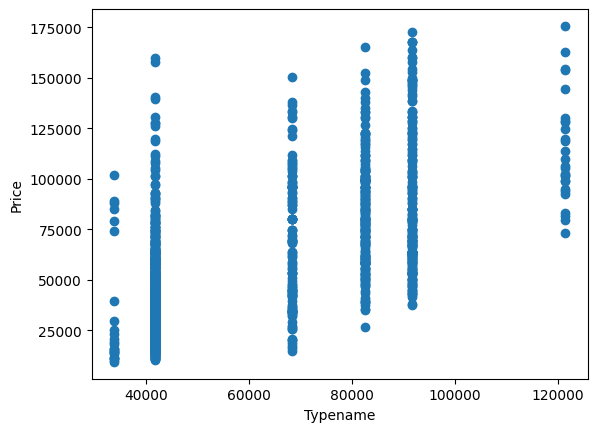

In [ ]:
plt.scatter(df['TypeName'],df['Price'])
plt.xlabel('Typename')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

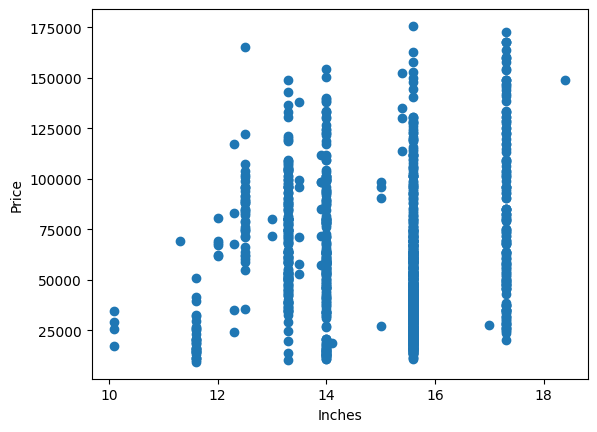

In [ ]:
plt.scatter(df['Inches'],df['Price'])
plt.xlabel('Inches')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

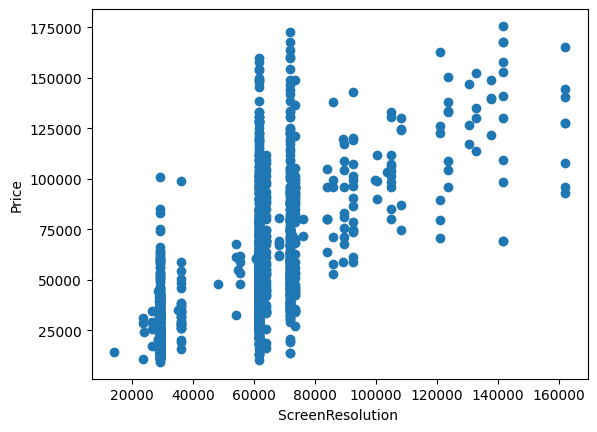

In [ ]:
plt.scatter(df['ScreenResolution '],df['Price'])
plt.xlabel('ScreenResolution ')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

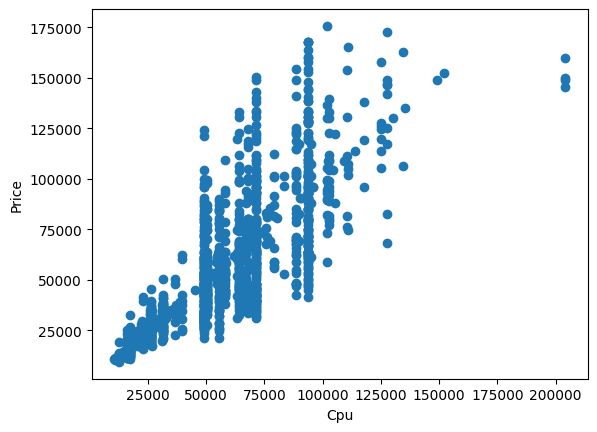

In [ ]:
plt.scatter(df['Cpu'],df['Price'])
plt.xlabel('Cpu')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

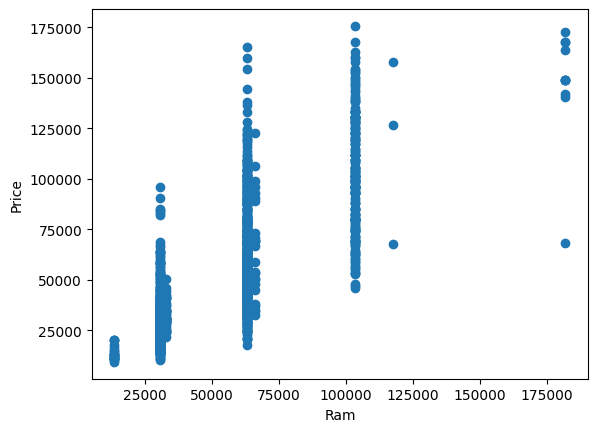

In [ ]:
plt.scatter(df['Ram'],df['Price'])
plt.xlabel('Ram')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

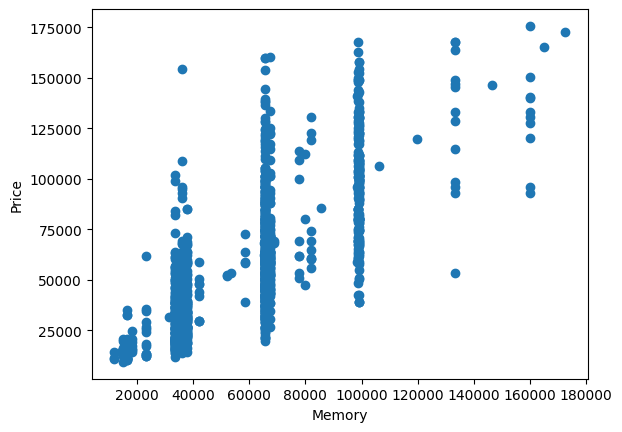

In [ ]:
plt.scatter(df['Memory'],df['Price'])
plt.xlabel('Memory')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

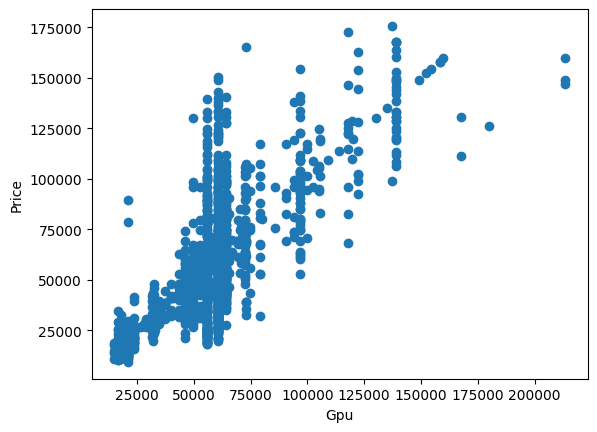

In [ ]:
plt.scatter(df['Gpu'],df['Price'])
plt.xlabel('Gpu')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

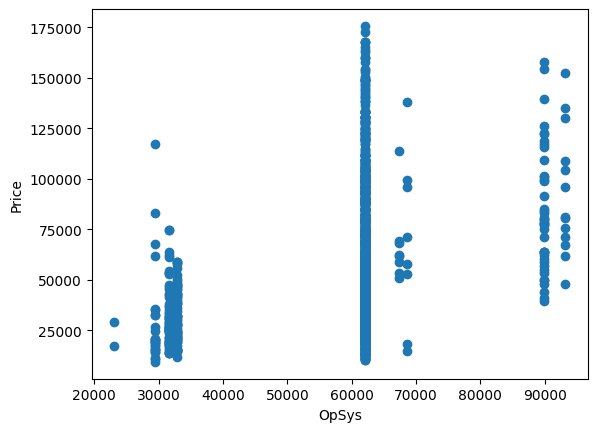

In [ ]:
plt.scatter(df['OpSys'],df['Price'])
plt.xlabel('OpSys')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

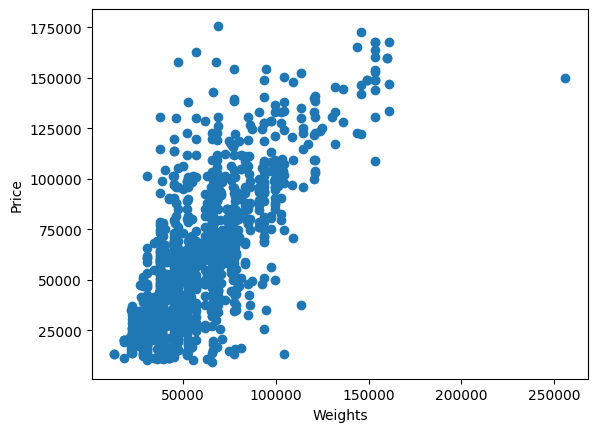

In [ ]:
plt.scatter(df['Weight'],df['Price'])
plt.xlabel('Weights')
plt.ylabel('Price')

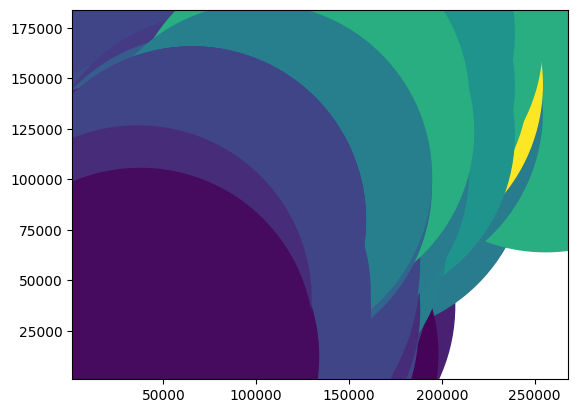

In [ ]:
plt.scatter(df['Weight'],df['Price'],df['OpSys'],df['Gpu'])